# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x-b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x-b)$.
   

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy,math

In [90]:
m = 1000
x_train  = np.random.random(m)*200
w_true = 150
b_true = 80
noise = 5000*np.random.normal(size=m)
y_train = (w_true*x_train+b_true)+noise

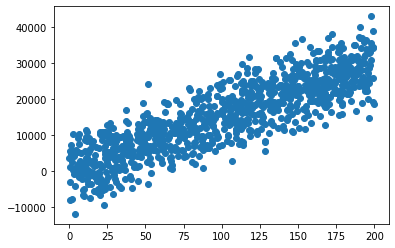

In [91]:
plt.scatter(x_train,y_train)

(array([  8.,  45., 111., 167., 175., 164., 180., 112.,  34.,   4.]),
 array([-11823.23415259,  -6333.54784796,   -843.86154333,   4645.82476129,
         10135.51106592,  15625.19737054,  21114.88367517,  26604.56997979,
         32094.25628442,  37583.94258904,  43073.62889367]),
 <BarContainer object of 10 artists>)

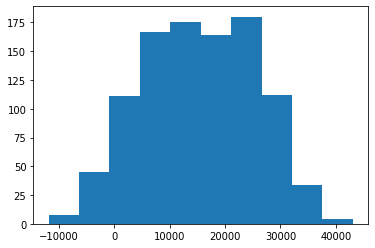

In [92]:
plt.hist(y_train)

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [93]:
def model_loop(x, w, b):
    m = x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i]+b
        
    return f_wb
def model_np(x, w, b):
    f_wb = w*x+b
    return f_wb


In [94]:
test1 = model_np(x_train,150,90)
test2 = model_loop(x_train,150,90)

In [95]:
test1==test2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

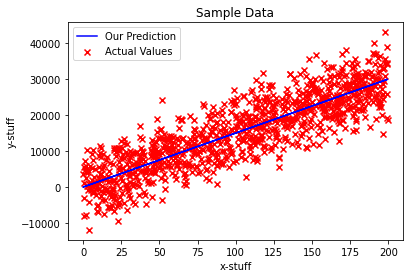

In [96]:
w = w_true
b = b_true

tmp_f_wb = model_np(x_train,w,b)
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values')

plt.title('Sample Data')
plt.ylabel('y-stuff')
plt.xlabel('x-stuff')
plt.legend()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [97]:
def cost(x,y,w,b):
    m = x.shape[0]
    f_wb = w*x+b
    total_cost = np.square(np.subtract(f_wb,y)).mean()/2
    return total_cost
    

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [98]:
def gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    f_wb = w*x+b
    
    dj_dw = np.sum((f_wb-y)*x)/m
    dj_db = np.sum(f_wb-y)/m
    
    return dj_dw, dj_db



6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [99]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:
            cost_func = cost(x,y,w,b)
            J_history.append(cost_func)
          
            
        if i% math.ceil(num_iters/10) == 0:
            p_history.append([w,b])
            
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

In [100]:
w_init = 0
b_init = 0
iterations = 1000
tmp_alpha = 0.00000001


w_final, b_final, J_hist, p_hist = gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,iterations,cost,gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.70e+08  dj_dw: -2.076e+06, dj_db: -1.541e+04   w:  2.076e-02, b: 1.54118e-04
Iteration  100: Cost 1.66e+08  dj_dw: -2.048e+06, dj_db: -1.520e+04   w:  2.082e+00, b: 1.54600e-02
Iteration  200: Cost 1.62e+08  dj_dw: -2.020e+06, dj_db: -1.500e+04   w:  4.116e+00, b: 3.05583e-02
Iteration  300: Cost 1.58e+08  dj_dw: -1.992e+06, dj_db: -1.479e+04   w:  6.122e+00, b: 4.54517e-02
Iteration  400: Cost 1.54e+08  dj_dw: -1.965e+06, dj_db: -1.459e+04   w:  8.100e+00, b: 6.01431e-02
Iteration  500: Cost 1.50e+08  dj_dw: -1.938e+06, dj_db: -1.439e+04   w:  1.005e+01, b: 7.46352e-02
Iteration  600: Cost 1.46e+08  dj_dw: -1.912e+06, dj_db: -1.420e+04   w:  1.198e+01, b: 8.89308e-02
Iteration  700: Cost 1.43e+08  dj_dw: -1.886e+06, dj_db: -1.401e+04   w:  1.388e+01, b: 1.03032e-01
Iteration  800: Cost 1.39e+08  dj_dw: -1.860e+06, dj_db: -1.382e+04   w:  1.575e+01, b: 1.16943e-01
Iteration  900: Cost 1.36e+08  dj_dw: -1.835e+06, dj_db: -1.363e+04   w:  1.760e+01, b: 1.30664e-01


7. Plot the cost and parameters versus iteration of gradient descent.

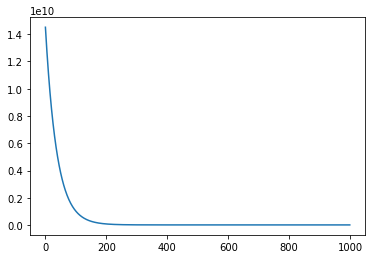

In [73]:
plt.plot(range(len(J_hist)),J_hist)

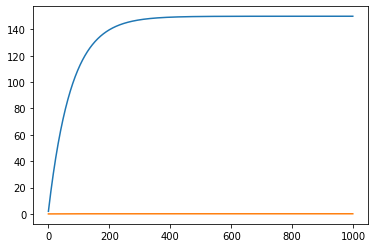

In [74]:
plt.plot(range(len(p_hist)),p_hist)

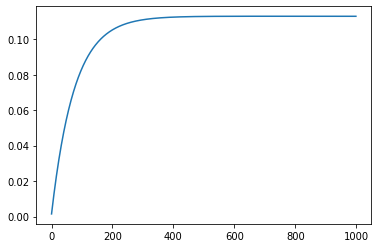

In [75]:
plt.plot(range(len(p_hist)),np.array(p_hist)[:,1])